In [2]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

<font color=black size=4>

# 第八章 数学物理定解问题
    
</font>

<font color=blue size=4>

## 1. (10分) 求解细杆导热问题，杆长为$l$，两瑞保持为零度，初始温度分布为$\displaystyle{u|_{t=0}=\frac{b}{l^2}x(l-x)}$，其中$b$为常数。

</font>

<font color=blue>解1：</font>
本题是<font color=red>热传导问题</font>，可列出方程组：
$$
\begin{cases}
u_t - a^2 u_{xx} = 0\\
u|_{x=0} = 0; \quad u|_{x=l} = 0 \\
u|_{t=0} = \displaystyle{\frac{b}{l^2}x(l-x)}
\end{cases}
$$
<font color=red>边界条件</font>为齐次，所以可以直接用分离变量法，设$u(x,t) = X(x)T(t)$,可得
$$
\frac{\partial u}{\partial t} = X(t)\cdot\frac{\mathrm{d}T}{\mathrm{d}t}, \quad a^2\cdot\frac{\partial^2 u}{\partial x^2} = a^2T\cdot\frac{\mathrm{d}^2X}{\mathrm{d}x^2}
$$
并代入泛定方程：
$$
\frac{T'}{a^2T} = \frac{X''}{X} = -\lambda
$$
联立<font color=red>边界条件</font>可得，
$$
\begin{cases}
X'' + \lambda X = 0 \\
T' + a^2\lambda T = 0 \\
X(0) = 0, \quad X(l) = 0
\end{cases}
$$
已知$\lambda>0$，第一个方程的通解为 $X(x) = C_1\cos{\sqrt{\lambda}x} + C_2\sin{\sqrt{\lambda}x}$。
代入<font color=red>边界条件</font>可得：
$$
\begin{cases}
X(0) &= C_1 = 0 \\
X(0) &= C_2\sin{\sqrt{\lambda}x} = 0
\end{cases}
$$
可以知道$\displaystyle{\lambda=\frac{n^2\pi^2}{l^2}},\quad (n=0,1,2,\cdots)$，因此
$$
X(x) = C_2\,\displaystyle{\sin{\frac{n\pi x}{l}}}
$$
把本征值$\lambda$代入$T$的方程可得$\displaystyle{T'_n=-\frac{a^2n^2\pi^2}{l^2}T_n}$，其通解为
$$
T_n(t) = C_3\,e^{-\frac{n^2\pi^2a^2}{l^2}t} \quad (n=0,1,2,\cdots)
$$
这样，$u(x,t)$的解为
$$
u(x,t) = \sum^\infty_{n=0}{C_ne^{-\frac{n^2\pi^2a^2}{l^2}t}\sin{\frac{n\pi x}{l}}}
$$
代入<font color=blue>初始条件</font>可得
$$
\sum^\infty_{n=0}{C_n\sin{\frac{n\pi x}{l}}} = \frac{b}{l^2}x(l-x)
$$
该傅里叶级数展开系数为
$$
C_n = \frac{2}{l}\int^l_0{\frac{b}{l^2}x(l-x)\sin{\frac{n\pi x}{l}}\mathrm{d} x} = \frac{4b}{n^3\pi^3}(1-\cos{n\pi})
$$
所以，$u(x,t)$的解为
$$
u(x,t) = \sum^\infty_{n=0}{\frac{4b}{n^3\pi^3}(1-\cos{n\pi})e^{-\frac{n^2\pi^2a^2}{l^2}t}\sin{\frac{n\pi x}{l}}}
$$

In [ ]:
def func81(n,a,b,l,x,t):
    return 4*b*(1-np.cos(n*np.pi))*np.exp(-n**2*np.pi**2*a**2*t/l**2)*np.sin(n*np.pi*x/l)/(n**3*np.pi**3)
def func82(nn,a,b,l,x,t):
    return np.sum([func81(ii,a,b,l,x,t) for ii in nn], axis=0)

In [ ]:
a = 0.5; b = 1; l = 1
numt = 401; numx = 201
n = np.linspace(1, 10, num=10, dtype=np.integer)
x = np.linspace(0, l, num=numx)
t = np.linspace(0, 4.0, num=numt)

uu = np.array([func82(n, a,b,l,ix,it) for it in t for ix in x]).reshape(numt, numx)

fig, ax = plt.subplots(figsize=(6,5), dpi=150)

line, = ax.plot([], [], lw=5, color='red')

ax.grid(ls='--')
time_template = 'time = %.1fs/%0.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 0.3)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_yticks([0, 0.1, 0.2, 0.3])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$T$')
    line.set_data([], [])
    time_text.set_text('')
    return line,time_text

def gen_lines():
    for ii, iu in enumerate(uu):
        yield [x, iu, t[ii]]

def animate(data):
    line.set_data(data[0], data[1])
    time_text.set_text(time_template %(data[2], t[-1]))
    return line,time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=gen_lines,
                               interval=50, repeat_delay=2000, blit=False, save_count=numt)

anim.save('exec81.gif', writer=animation.PillowWriter(fps=30))

<font color=blue size=4>

## 2. (10分) 长为$l$的杆，上端固定在电梯天花板，杆身竖直，下端自由。电梯下降，当速度为$v_0$时突然停止，求解杆的振动。

</font>

<font color=blue>解</font>：
本题是杆的纵振动问题，可列方程组：
$$
\begin{cases}
u_{tt}-a^2u_{xx} = 0 \\
u|_{x=0}=0, \quad u_x|_{x=l} = 0 \\
u|_{t=0}=0, \quad u_t|_{t=0} = v_0
\end{cases}
$$

该泛定方程是线性齐次偏微分方程，齐次边界条件，采用分离变量法，令$u(x,t)=X(x)T(t)$并代入泛定方程可得：
$$
u_{tt} = X(x)T''(t), \quad a^2u_{xx} = a^2T(t)X''(x)
$$
$$
\frac{T''}{a^2T} = \frac{X''}{X} = -\lambda
$$
结合边界条件可得：
$$
\begin{cases}
X''+\lambda X = 0 \\
T''+a^2\lambda T = 0 \\
X(0) = 0, \quad X'(l) = 0
\end{cases}
$$
方程1的通解是$X=A\cos{\sqrt{\lambda}x}+B\sin{sqrt{\lambda}x}$
结合边界条件可得
$$
\begin{cases}
X(0) = A = 0 \\
X'(l) = B\sqrt{\lambda}\cos{\sqrt{\lambda}l} = 0
\end{cases}
$$
方程的本征值为$\lambda_n = \displaystyle{\frac{(n+\frac{1}{2})^2\pi^2}{l^2}},\quad (n=0,1,2,\cdots)$，和本征函数$X_n(x)=\displaystyle{B\frac{(n+\frac{1}{2})\pi}{l}\sin{\frac{(n+\frac{1}{2})\pi}{l}x}}$。

泛定方程 $T''_n+ a^2 \displaystyle{\frac{(n+\frac{1}{2})\pi}{l} T_n} = 0$ 的通解为 $T_n=\displaystyle{C_n\cos{\frac{a(n+\frac{1}{2})\pi}{l}t} + D_n\sin{\frac{a(n+\frac{1}{2})\pi}{l}t}}$
于是我们可以得到：
$$
\begin{align*}
u_n(x,t) &= \left[C_n\cos{\frac{a(n+\frac{1}{2})\pi}{l}t} + D_n\sin{\frac{a(n+\frac{1}{2})\pi}{l}t}\right]\sin{\frac{(n+\frac{1}{2})\pi}{l}x} \\
u(x,t)   &= \sum^\infty_{n=0}{\left[C_n\cos{\frac{a(n+\frac{1}{2})\pi}{l}t} + D_n\sin{\frac{a(n+\frac{1}{2})\pi}{l}t}\right]\sin{\frac{(n+\frac{1}{2})\pi}{l}x}}
\end{align*}
$$
代放初始条件可得
$$
\begin{align*}
 & \sum^\infty_{n=0}C_n\sin{\frac{(n+\frac{1}{2})\pi}{l}x} = 0 \\
 & \sum^\infty_{n=0}D_n\frac{a(n+\frac{1}{2})\pi}{l}\sin{\frac{(n+\frac{1}{2})\pi}{l}x} = v_0
\end{align*}
$$
$$
\begin{align*}
 & C_n = 0 \\
 & D_n = \displaystyle{\frac{2v_0 l}{(n+\frac{1}{2})^2\pi^2 a}}
\end{align*}
$$
所以原方程的解为
$$
u(x,t) = \sum^\infty_{n=0}{\frac{2v_0 l}{a(n+\frac{1}{2})^2\pi^2}\,\sin{\frac{a(n+\frac{1}{2})\pi}{l}t}\,\sin{\frac{(n+\frac{1}{2})\pi}{l}x}}
$$

In [3]:
def func83(n,a,v0,l,x,t):
    return 2*v0*l*np.sin(a*(n+0.5)*np.pi*t/l)*np.sin(np.pi*(n+0.5)*x/l)/(a*(n+0.5)**2.0*np.pi**2.0)
def func84(n,a,v0,l,x,t):
    return np.sum(np.array([func83(ii,a,v0,l,x,t) for ii in n]), axis=0)

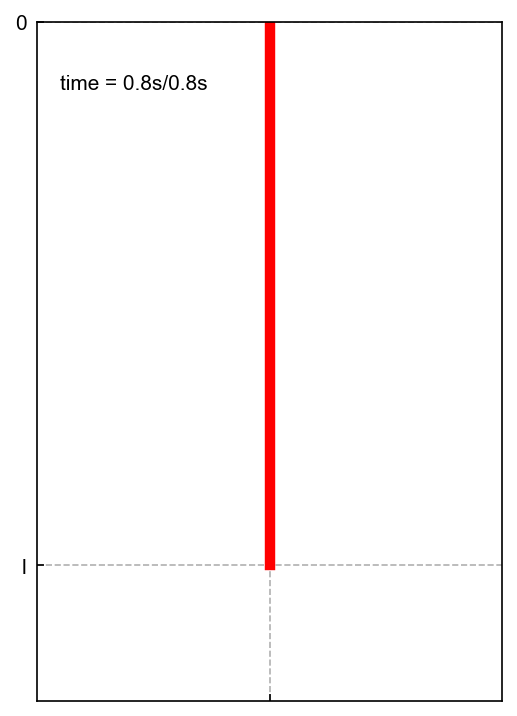

In [28]:
a = 10; b = 1; l = 2
numt = 101; numx = 201
n = np.arange(11)
x = np.linspace(0, -l, num=numx)
t = np.linspace(0, 4*l/a, num=numt)

uu = x + np.array([func84(n,a,b,l,ix,it) for it in t for ix in x]).reshape(numt, numx)

fig, ax = plt.subplots(figsize=(4,6), dpi=150)

line, = ax.plot([], [], lw=5, color='red')
time_template = 'time = %.1fs/%0.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    ax.set_xlim(-0.04, 0.04)
    ax.set_ylim(-2.5, 0)
    ax.set_xticks([0])
    ax.set_yticks([-2.0, 0])
    ax.set_yticklabels([r'l', r'0'])
    ax.set_xticklabels([''])
    # ax.set_ylabel(r'$u$')
    ax.grid(ls='--')
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def gen_lines():
    for ii, iu in enumerate(uu):
        yield [0, iu, t[ii]]

def animate(data):
    line.set_data(data[0], data[1])
    time_text.set_text(time_template %(data[2], t[-1]))
    return line, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=gen_lines,
                               interval=50, repeat_delay=100, blit=False, save_count=numt)

anim.save('exec82.gif', writer=animation.PillowWriter(fps=30))

<font color=blue size=4>

## 3. (10分) 长为$2l$的匀质杆，其两端受压而使杆长压缩了$2\varepsilon l$，放手后作其自由振动，求杆的振动情况。

</font>

<font color=blue>解</font>：
本题是杆的纵振动问题，可列方程组：
$$
\begin{cases}
u_{tt}-a^2u_{xx} = 0 \\
u|_{x=0}=0, \quad u_x|_{x=l} = 0 \\
u|_{t=0}=-\varepsilon x, \quad u_t|_{t=0} = 0
\end{cases}
$$

该泛定方程是线性齐次偏微分方程，齐次边界条件，采用分离变量法，令$u(x,t)=X(x)T(t)$并代入泛定方程可得：
$$
\begin{cases}
X''+\lambda X = 0 \\
T''+a^2\lambda T = 0 \\
X(0) = 0, \quad X'(l) = 0
\end{cases}
$$
方程的本征值为$\lambda_n = \displaystyle{\frac{(n+\frac{1}{2})^2\pi^2}{l^2}},\quad (n=0,1,2,\cdots)$，和本征函数$X_n(x)=\displaystyle{B\,\sin{\frac{(n+\frac{1}{2})\pi}{l}x}}$。

泛定方程 $T''_n+ a^2 \displaystyle{\frac{(n+\frac{1}{2})\pi}{l} T_n} = 0$ 的通解为 $T_n=\displaystyle{C_n\cos{\frac{a(n+\frac{1}{2})\pi}{l}t} + D_n\sin{\frac{a(n+\frac{1}{2})\pi}{l}t}}$
于是我们可以得到：
$$
u(x,t) = \sum^\infty_{n=0}{\left[C_n\cos{\frac{a(n+\frac{1}{2})\pi}{l}t} + D_n\sin{\frac{a(n+\frac{1}{2})\pi}{l}t}\right]\sin{\frac{(n+\frac{1}{2})\pi}{l}x}}
$$
代入始初条件可得:
$$
\begin{cases}
\displaystyle{\sum^\infty_{n=0}{C_n\,\sin{\frac{(n+\frac{1}{2})\pi x}{l}}} = -\varepsilon x } \\
\displaystyle{\sum^\infty_{n=0}{D_n\frac{(n+\frac{1}{2})\pi a}{l}\sin{\frac{(n+\frac{1}{2})\pi x}{l}}} = 0}
\end{cases}
$$
$$
\begin{cases}
C_n = \displaystyle{\frac{(-1)^{n+1}2\varepsilon l}{(n+\frac{1}{2})^2\pi^2}} \\
D_n = 0
\end{cases}
$$
因此原方程的解为
$$
u(x,t) = \frac{2\varepsilon l}{\pi^2}\sum^\infty_{n=0}{\frac{(-1)^{n+1}}{(n+\frac{1}{2})^2}\,\cos{\frac{(n+\frac{1}{2})\pi at}{l}}\,\sin{\frac{(n+\frac{1}{2})\pi x}{l}}}
$$

In [18]:
def func85(n,a,l,x,t):
    return (-1)**(n+1)*np.cos(a*(n+0.5)*np.pi*t/l)*np.sin(np.pi*(n+0.5)*x/l)/((n+0.5)**2.0)
def func86(nn,a,e,l,x,t):
    return 2*e*l*np.sum([func85(ii,a,l,x,t) for ii in nn], axis=0)/(np.pi**2.0)

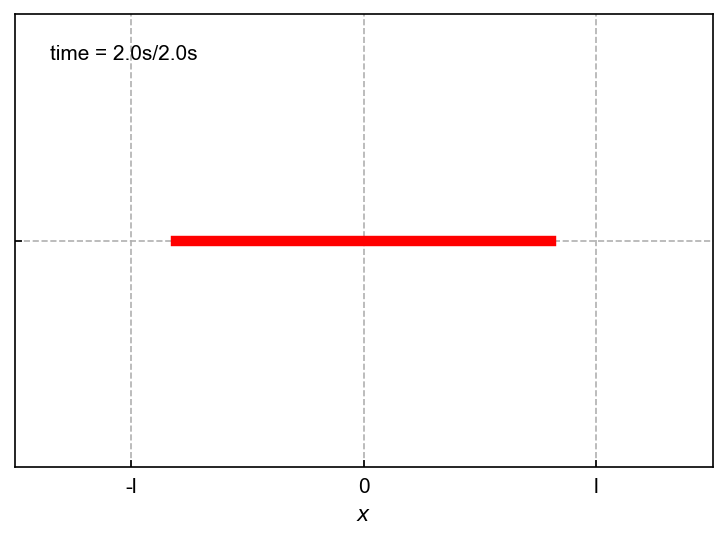

In [24]:
a = 2; b = 0.2; l = 1
numt = 101; numx = 201
n = np.arange(6)
x = np.linspace(-l, l, num=numx)
t = np.linspace(0, 4*l/a, num=numt)

uu = x + np.array([func86(n,a,b,l,ix,it) for it in t for ix in x]).reshape(numt, numx)

fig, ax = plt.subplots(figsize=(6,4), dpi=150)

line, = ax.plot([], [], lw=5, color='red')
time_template = 'time = %.1fs/%0.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.04, 0.04)
    ax.set_xticks([-1.0, 0, 1.0])
    ax.set_xticklabels([r'-l', r'0', r'l'])
    ax.set_yticks([0.0])
    ax.set_yticklabels([r''])
    ax.set_xlabel(r'$x$')
    # ax.set_ylabel(r'$u$')
    ax.grid(ls='--')
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def gen_lines():
    for ii, iu in enumerate(uu):
        yield [iu, 0, t[ii]]

def animate(data):
    line.set_data(data[0], data[1])
    time_text.set_text(time_template %(data[2], t[-1]))
    return line, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=gen_lines,
                               interval=50, repeat_delay=100, blit=False, save_count=numt)

anim.save('exec83.gif', writer=animation.PillowWriter(fps=30))

<font color=blue size=4>

## 4. (10分) 一矩形薄板$(0\leq x\leq l_1, 0\leq y\leq l_2)$，两板面不透热，边缘保持为零度。设初始温度为$A\sin{\frac{\pi x}{l_1}}\sin{\frac{2\pi y}{l_2}}$，求此后板内的温度分布。

</font>

<font color=blue>解</font>：
本题是二维的热传导问题，可列方程组：
$$
\begin{cases}
u_t - a^2 \nabla^2 u = 0 \\
u|_{x=0} = 0, \quad u|_{x=l_1}=0, \quad u|_{y=0}=0, \quad u|_{y=l_2} = 0 \\
u|_{t=0} = \displaystyle{ A\,\sin{\frac{\pi x}{l_1}}\,\sin{\frac{\pi x}{l_2}}}
\end{cases}
$$
由于是齐次边界条件，所以可以采用分离变量法$u(x,y,t)=X(x)Y(y)T(t)$，代入泛定方程可得：
$$
\begin{cases}
a^2(u_{xx}+u_{yy}) = a^2YTX'' + a^2XTY'' \\
u_t = XYT'
\end{cases}
$$
令$\displaystyle{\frac{X''}{X} = -\lambda_1}$、$\displaystyle{\frac{Y''}{Y} = -\lambda_2}$以及$\displaystyle{\frac{T'}{T} = -(\lambda_1+\lambda_2)}$可得
$$
\begin{cases}
X''+\lambda_1 X = 0 \\
Y''+\lambda_2 Y = 0 \\
X(0) = 0, \quad X(l_1) = 0 \\
Y(0) = 0, \quad Y(l_2) = 0 \\
T'+a^2(\lambda_1+\lambda_2)T = 0
\end{cases}
$$
可以得到两个方程组
$$
\begin{cases}
X''+\lambda_1 X = 0 \\
X(0) = 0, \quad X(l_1) = 0
\end{cases}
$$
和
$$
\begin{cases}
Y''+\lambda_2 Y = 0 \\
Y(0) = 0, \quad Y(l_2) = 0
\end{cases}
$$
于是我们可以得到两个本征值$\lambda_1=\displaystyle{\frac{n^2_1\pi^2}{l^2_1}}$和$\lambda_2=\displaystyle{\frac{n^2_2\pi^2}{l^2_2}}$，以及两个本征函数$X(x)=\displaystyle{B_{n_1}\sin{\frac{n_1\pi x}{l_1}}}$和$Y(y)=\displaystyle{C_{n_2}\sin{\frac{n_2\pi x}{l_2}}}$。
把这两个本征值代入到原方程组
$$
\begin{align*}
 T(t) &= D_{n_1n_2}e^{-a^2(\frac{n^2_1\pi^2}{l^2_1}+\frac{n^2_2\pi^2}{l^2_2})t} \\
 u_{n_1n_2}(x,y,t) &= D_{n_1n_2}\sin{\frac{n_1\pi x}{l_1}}\sin{\frac{n_2\pi y}{l_2}}e^{-a^2(\frac{n^2_1\pi^2}{l^2_1}+\frac{n^2_2\pi^2}{l^2_2})t} \\
 u(x,y,t) &= \sum^\infty_{n_1=0}\sum^\infty_{n_2=0}{D_{n_1n_2}\sin{\frac{n_1\pi x}{l_1}}\sin{\frac{n_2\pi y}{l_2}}e^{-a^2(\frac{n^2_1\pi^2}{l^2_1}+\frac{n^2_2\pi^2}{l^2_2})t}}
\end{align*}
$$
代入初始条件
$$
\sum^\infty_{n_1=0}\sum^\infty_{n_2=0}{D_{n_1n_2}\sin{\frac{n_1\pi x}{l_1}}\sin{\frac{n_2\pi y}{l_2}}} = A\sin{\frac{\pi x}{l_1}}\sin{\frac{2\pi y}{l_2}}
$$
可以看出来只存在$n_1=1$，$n_2=2$，$D_{12}=A$，所以原方程的解为：
$$
u(x,y,t) = A\sin{\frac{\pi x}{l_1}}\sin{\frac{2\pi y}{l_2}}e^{-a^2(\frac{\pi^2}{l^2_1}+\frac{4\pi^2}{l^2_2})t}
$$

In [3]:
def func87(a,b,l1,l2,x,y,t):
    return a*np.sin(np.pi*x/l1)*np.sin(2*np.pi*y/l2)*np.exp(-b**2.0*(np.pi**2.0/l1**2.0+4*np.pi**2.0/l2**2.0)*t)

/var/folders/v5/npn73hb52693kl9zbgmyj1cw0000gn/T/ipykernel_58320/3027149418.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  anno = ax.annotate(time_template.format(int(1000*t[ii]), int(1000*t[-1])), (0.1, 0.9), Transform=ax.transAxes)


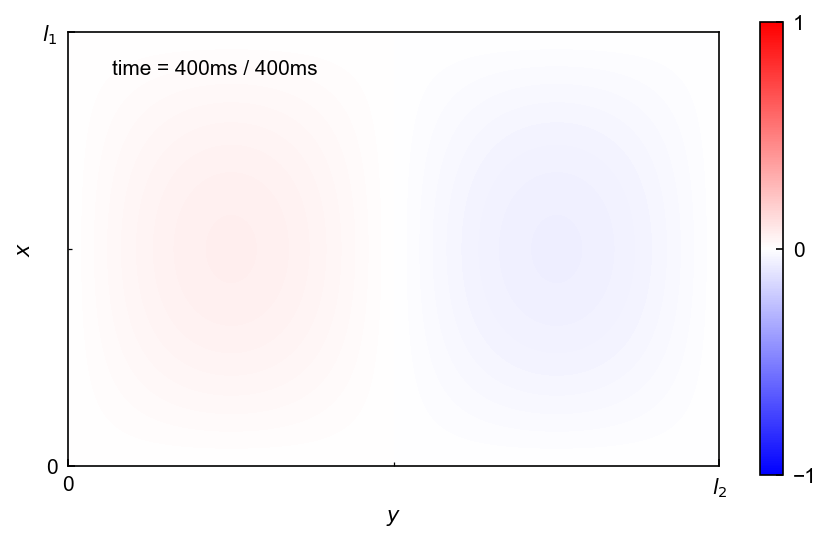

In [9]:
a = 1; b = 0.5; l1 = 1; l2 = 1.5
numt = 201; numx = 401; numy = 601
x = np.linspace(0, l1, num=numx)
y = np.linspace(0, l2, num=numy)
t = np.linspace(0, 0.4, num=numt)

uu = np.array([func87(a,b,l1,l2,ix,iy,it) for it in t for ix in x for iy in y]).reshape(numt, numx, numy)

umin = uu.min()
umax = uu.max()

fig, ax = plt.subplots(figsize=(7,4), dpi=150)

time_template = 'time = {:3d}ms / {:3d}ms'

ims = []
for ii, iu in enumerate(uu):
    if ii == 0: 
        im = ax.imshow(iu, vmin=umin, vmax=umax, cmap='bwr', origin='lower', interpolation='bicubic', extent=(0,l2,0,l1))
    else:
        im = ax.imshow(iu, vmin=umin, vmax=umax, cmap='bwr', origin='lower', interpolation='bicubic', extent=(0,l2,0,l1), animated=True)
    anno = ax.annotate(time_template.format(int(1000*t[ii]), int(1000*t[-1])), (0.1, 0.9), Transform=ax.transAxes)
    ims.append([im, anno])

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000, blit=True)

ax.set_xticks([0,l2])
ax.set_yticks([0,l1])
ax.set_xticks([l2/2], minor=True)
ax.set_yticks([l1/2], minor=True)
ax.set_xticklabels([r'0', r'$l_2$'])
ax.set_yticklabels([r'0', r'$l_1$'])

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$x$')

cbar = plt.colorbar(im, ticks=[-1, 0, 1])
# cbar.ax.set_yticks([-1,-0.5,0,0.5,1])

anim.save('exec84.gif', writer=animation.PillowWriter(fps=30))

<font color=blue size=4>

## 5. (10分) 在圆形域内求解$\Delta u=0$，使分别满足边界条件：(1) $u|_{\rho=\rho_0} = A\cos{\varphi}$；(2) $u|_{\rho=\rho_0}=A+B\sin\varphi$。其中$A$、$B$为常数。

</font>

<font color=blue>解</font>：
展开写原方程为
$$
\Delta u = \rho^2\cdot u_{\rho\rho} + \rho\cdot u_{\rho} + u_{\varphi\varphi} = 0
$$
把原函数分离变量$u(\rho,\varphi) = R(\rho)\Phi(\varphi)$，则原方程写为:
$$
\Delta u = \rho^2\Phi(\varphi)R''(\rho) + \rho\Phi(\varphi)R'(\rho) + R(\rho)\Phi''(\varphi) = 0
$$
方程两边都除以$u$可得
$$
\rho^2\frac{R''(\rho)}{R(\rho)} + \rho\frac{R'(\rho)}{R(\rho)} = - \frac{\Phi''(\varphi)}{\Phi(\varphi)}  = \lambda
$$
于是我们可以得到方程组：
$$
\begin{cases}
\rho^2 R''(\rho) + \rho R'(\rho) - \lambda R(\rho) = 0 \\
\Phi''(\varphi) + \lambda \Phi(\varphi) = 0
\end{cases}
$$
方程2根据$\lambda$的符号可以有三种通解
$$
\Phi(\varphi)=
\begin{cases}
A\cos{\sqrt{\lambda}\varphi} + B\sin{\sqrt{\lambda}\varphi} & (\lambda >0) \\
A+B\varphi & (\lambda = 0) \\
A\cdot e^{\sqrt{-\lambda}\varphi} + B\cdot e^{-\sqrt{-\lambda}\varphi} &(\lambda<0 ) 
\end{cases}
$$
结合隐含的周期边界条件$\Phi(\varphi+2\pi) = \Phi(\varphi)$，知道方程1的本征值$\lambda = m^2$，本征函数$\Phi(\varphi)=A\cos{m\varphi}+B\sin{m\varphi}, (m\neq 0)$，方程2$\Phi(\varphi)=A, (m=0)$，方程3无解，整理可得
$$
\begin{align*}
\lambda &= m, \quad (m=0,1,2,\cdots)\\
\Phi(\varphi) &= 
\begin{cases}
A\cos{m\varphi}+B\sin{m\varphi} & (m\neq 0) \\
A    & (m=0) 
\end{cases}
\end{align*}
$$
把本征值代入到径向方程(<font color=red>欧拉常微分方程</font>)
$$
\rho^2 R'' + \rho R' - m^2 R = 0
$$
代换变量$\rho = e^t$，并且$t=\ln{\rho}$。
$$
\frac{\mathrm{d} t}{\mathrm{d}\rho} = \frac{1}{\rho} \\
\frac{\mathrm{d} R}{\mathrm{d}\rho} = \frac{\mathrm{d}R}{\mathrm{d}t}\,\frac{\mathrm{d}t}{\mathrm{d}\rho} = \frac{1}{\rho}\,\frac{\mathrm{d}R}{\mathrm{d}t} \\
\frac{\mathrm{d}^2 R}{\mathrm{d}\rho^2} = \frac{\mathrm{d}}{\mathrm{d}\rho}\left(\frac{1}{\rho}\,\frac{\mathrm{d}R}{\mathrm{d}t}\right) = -\frac{1}{\rho^2}\,\frac{\mathrm{d}R}{\mathrm{d}t} + \frac{1}{\rho^2}\,\frac{\mathrm{d}^2R}{\mathrm{d}t^2}
$$
代回欧拉方程可得
$$
\rho^2 R'' + \rho R' - m^2 R = \frac{\mathrm{d}^2 R}{\mathrm{d}t^2} - m^2 R = 0 
$$
该方程的通解为
$$
R(\rho) = 
\begin{cases}
C\,e^{mt}+D\,e^{-mt} = C\rho^m+D\rho^{-m} & (m\neq 0) \\
C + Dt = C + D\ln{\rho} & (m=0)
\end{cases}
$$
所以原方程的本征解为：
$$
\begin{align*}
u_0(\rho,\varphi) &= C_0 + D_0\,\ln{\rho} \\
u_m(\rho,\varphi) &= (C_m\rho^m+D_m\rho^{-m})(A_m\,\cos{m\varphi} + B_m\,\sin{m\varphi})
\end{align*}
$$
原方程的一般解为：
$$
u(\rho,\varphi) = C_0 + D_0\,\ln{\rho}+\sum^\infty_{m=1}{(C_m\rho^m+D_m\rho^{-m})(A_m\,\cos{m\varphi} + B_m\,\sin{m\varphi})}
$$
由于$\ln\,\rho$和$\rho^{-m}$在$\rho=0$的时候放散，这两项系数为零。上式可以简化为
$$
u(\rho,\varphi) = C_0 + \sum^\infty_{m=1}{ \rho^m(A_m\,\cos{m\varphi} + B_m\,\sin{m\varphi})}
$$
1. $\displaystyle{u|_{\rho=\rho_0}=A\cos{\varphi}}$
边界条件代入泛定方程
$$
C_0 + \sum^\infty_{m=1}{\rho^m_0(A_m\,\cos{m\varphi} + B_m\,\sin{m\varphi})} = A\cos{\varphi}
$$
可知$\displaystyle{A_1=\frac{A}{\rho_0}}$，其余皆为零。
$$
u(\rho,\varphi) = \frac{A}{\rho_0}\rho\cos{\varphi}
$$

2. $\displaystyle{u|_{\rho=\rho_0}=A+B\sin{\varphi}}$
边界条件代入泛定方程
$$
C_0 + \sum^\infty_{m=1}{\rho^m_0(A_m\,\cos{m\varphi} + B_m\,\sin{m\varphi})} = A+B\sin{\varphi}
$$
可知$C_0=A$， $B_1=\displaystyle{\frac{B}{\rho_0}}$，其余项都为零。
$$
u(\rho,\varphi) = A + \frac{B}{\rho_0}\rho\sin{\varphi}
$$

<font color=blue size=4>

## 6. (10分) 求解本征值问题，得出本征值和本征函数。
1. 
$$
\begin{cases}
    X''+\lambda X = 0 \\
    X'(0) = 0,  X'(l) = 0
\end{cases}
$$

2.
$$
\begin{cases}
    X''+\lambda X = 0 \\
    X(0) = 0,  X'(\pi) = 0
\end{cases}
$$

3.
$$
\begin{cases}
    X''+\lambda X = 0 \\
    X'(0) = 0,  X'(\pi) = 0
\end{cases}
$$

4.
$$
\begin{cases}
    X''+\lambda X = 0 \\
    X(0) = 0,  \alpha X(l) + \beta X'(l) = 0
\end{cases}
$$
其中$\alpha$、$\beta$、$l$为实常数且$\alpha l+\beta \neq 0$。

5.
$$
\begin{cases}
    X''+\lambda X = 0 \\
    \alpha_1 X(0) + \beta_1 X'(0) = 0,  \alpha_2 X(l) + \beta_2 X'(l) = 0
\end{cases}
$$
其中$\alpha_1$、$\alpha_2$、$\beta_1$、$\beta_2$、$l$为实常数。
</font>

<font color=blue>解</font>：
方程$\displaystyle{X''+\lambda X = 0}$的通解为
$$
\begin{cases}
X=Ae^{\sqrt{-\lambda}x} + Be^{-\sqrt{-\lambda}x} & \quad (\lambda<0) \\
X=A+Bx & \quad (\lambda=0) \\
X=A\cos{\sqrt{\lambda}x} + B\sin{\sqrt{\lambda}x} & \quad (\lambda>0)
\end{cases}
$$
把通解依次代入边界条件：

1. 
(1) $\lambda < 0$
$$
\begin{cases}
X'(0) = (A-B) \sqrt{-\lambda} = 0 \\
X'(l) = A\sqrt{-\lambda} e^{\sqrt{-\lambda}l} - B\sqrt{-\lambda}e^{-\sqrt{-\lambda}l} = 0
\end{cases}
$$
$$
\begin{cases}
A = 0 \\
B = 0
\end{cases}
$$

(2) $\lambda = 0$
$$
\begin{cases}
X'(0) = B = 0 \\
X'(l) = B = 0 
\end{cases}
$$
$$
\begin{cases}
B = 0 \\
X = A
\end{cases}
$$

(3) $\lambda > 0$
$$
\begin{cases}
X'(0) = B\sqrt{\lambda} = 0 \\
X'(l) = -A\sqrt{\lambda}\sin{\sqrt{\lambda}} l + B\sqrt{\lambda}\cos{\sqrt{\lambda}}l = 0
\end{cases}
$$
$$
\begin{cases}
B = 0 \\
\lambda = \displaystyle{\frac{n^2\pi^2}{l^2}} \quad (n=0,1,2,\cdots) \\
X = \displaystyle{A\cos{\frac{n\pi x}{l}}}
\end{cases}
$$

2. 
(1) $\lambda < 0$
$$
\begin{cases}
X(0) = A + B = 0 \\
X'(\pi) = a\sqrt{-\lambda}e^{\sqrt{-\lambda}\pi} - B\sqrt{-\lambda}e^{-\sqrt{-\lambda}\pi}
\end{cases}
$$
$$
\begin{cases}
A = 0 \\
B = 0
\end{cases}
$$

(2) $\lambda = 0$
$$
\begin{cases}
X(0) = A = 0 \\
X'(\pi) = B = 0
\end{cases}
$$

(3) $\lambda > 0$
$$
\begin{cases}
X(0) = A = 0 \\
X'(\pi) = B\sqrt{\lambda}\cos{\sqrt{\lambda}\pi} = 0
\end{cases}
$$
$$
\lambda = \left(n+\frac{1}{2}\right)^2 \\
X = B\sin{\left(n+\frac{1}{2}\right)}x
$$

4. 
(1) $\lambda < 0$
$$
\begin{cases}
X(0) = A+B = 0 \\
\alpha X(l) + \beta X'(l) = \alpha(Ae^{\sqrt{-\lambda}l}+Be^{-\sqrt{-\lambda}l}) + \beta(A\sqrt{-\lambda}e^{-\sqrt{-\lambda}l}+B\sqrt{-\lambda}e^{\sqrt{-\lambda}l})=0
\end{cases}
$$
$$
\begin{cases}
A = 0 \\
B = 0
\end{cases}
$$

(2) $\lambda = 0$
$$
\begin{cases}
X(0) = A = 0 \\
\alpha X(l) + \beta X'(l) = = \alpha X(l)+\beta X'(l) + (\alpha l + \beta_)B = 0 
\end{cases}
$$
$$
\begin{cases}
A = 0 \\
B = 0
\end{cases}
$$

(3) $\lambda > 0$
$$
\begin{cases}
X(0) = A = 0
\alpha X(l) + \beta X'(l) = \alpha X(l) + \beta X'(l) = (\alpha \sin{\sqrt{\lambda}l}+\beta\sqrt{\lambda}\cos{\sqrt{\lambda}}l) B = 0
\end{cases}
$$
数值求解$\displaystyle{\tan{\sqrt{\lambda}l} + \frac{\beta}{\alpha}\sqrt{\lambda} = 0}$可得本征值，本征函数为$\displaystyle{X=B\sin{\sqrt{\lambda_n}}x}$

5. 
(1) $\lambda < 0$
$$
\begin{cases}
\alpha_1X(0)+\beta_1X'(0) = \alpha_1(A+B) + \beta_1(A-B)\sqrt{\lambda} = 0 \\
\alpha_2X(l)+\beta_2X'(l) = \alpha_2(Ae^{\sqrt{-\lambda}l}+Be^{-\sqrt{-\lambda}l}) + \beta_2(A\sqrt{-\lambda}e^{\sqrt{-\lambda}l}-B\sqrt{-\lambda}e^{-\sqrt{-\lambda}l})
\end{cases}
$$
$$
\begin{cases}
A = 0 \\
B = 0
\end{cases}
$$
(2) $\lambda = 0$
$$
\begin{cases}
\alpha_1X(0)+\beta_1X'(0) = \alpha_1 A + \beta_1 B = 0 \\
\alpha_2X(l)+\beta_2X'(l) = \alpha_2(A+Bl) + \beta_2 B = 0
\end{cases}
$$
$$
\begin{cases}
A = 0 \\
B = 0
\end{cases}
$$
(3) $\lambda > 0$
$$
\begin{cases}
\alpha_1 A + \beta_1\sqrt{\lambda}B = 0 \\
(\alpha_2\cos{\sqrt{\lambda}l}-\beta_2\sqrt{\lambda}\sin{\sqrt{\lambda}l})A + (\alpha_2\sin{\sqrt{\lambda}l}+\beta_2\sqrt{\lambda}\cos{\sqrt{\lambda}l})B = 0
\end{cases}
$$
需要由系数行列式
$$
\left|
\begin{array}{cc}
\alpha_1 & \beta_1\sqrt{\lambda} \\
\alpha_2\cos{\sqrt{\lambda}l} - \beta_2\sqrt{\lambda}\sin{\sqrt{\lambda}l} & \alpha_2\sin{\sqrt{\lambda}l}+\beta_2\sqrt{\lambda}\cos{\sqrt{\lambda}l}
\end{array}
\right|
$$
来求解本征值$\lambda_n$，本征函数为$\displaystyle{X=A\cos{\sqrt{\lambda_n}x}+B\sin{\sqrt{\lambda_n}x}}$

<font color=blue size=4>

## 7. (10分) 将极坐标系中的拉普拉斯方程分离变数：$\displaystyle{\frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho\frac{\partial u}{\partial\rho}\right)+\frac{1}{\rho^2}\frac{\partial^2u}{\partial\varphi^2}=0}$。

</font>

<font color=blue>解</font>：
令$u(\rho,\varphi) = R(\rho)\Phi(\varphi)$:
$$
\begin{align*}
\frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho\frac{\partial u}{\partial \rho}\right) &= \frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho R'\Phi \right) \\
    & = \frac{1}{\rho}(R'\Phi + \rho R''\Phi) \\
    & = \frac{1}{\rho}R'\Phi + R''\Phi
\end{align*}
$$
$$
\frac{1}{\rho^2}\frac{\partial^2 u}{\partial\varphi^2} = \frac{1}{\rho^2} \frac{\partial}{\partial \varphi}(R\Phi') = \frac{R}{\rho^2}\Phi''
$$
$$
\frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho\frac{\partial u}{\partial\rho}\right)+\frac{1}{\rho^2}\frac{\partial^2u}{\partial\varphi^2} = \frac{1}{\rho}R'\Phi + R''\Phi + \frac{R}{\rho^2}\Phi'' = 0
$$
两边同时除以$R\Phi$可得
$$
\frac{R'}{\rho R} + \frac{R''}{R} = - \frac{\Phi''}{\rho^2\Phi} = \lambda
$$
等价于下列方程组
$$
\begin{cases}
\Phi'' + \lambda\Phi = 0 \\
\rho^2 R'' + \rho R' - \lambda R = 0
\end{cases}
$$

<font color=blue size=4>

## 8. (10分) 将极坐标系中的亥姆霍兹方程分离变数：$\displaystyle{ \frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho\frac{\partial u}{\partial\rho}\right)+\frac{1}{\rho^2}\frac{\partial^2u}{\partial\varphi^2}+k^2u=0 }$

</font>

令$u(\rho,\varphi) = R(\rho)\Phi(\varphi)$:
$$
\begin{align*}
\frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho\frac{\partial u}{\partial \rho}\right) &= \frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho R'\Phi \right) \\
    & = \frac{1}{\rho}(R'\Phi + \rho R''\Phi) \\
    & = \frac{1}{\rho}R'\Phi + R''\Phi
\end{align*}
$$
$$
\frac{1}{\rho^2}\frac{\partial^2 u}{\partial\varphi^2} = \frac{1}{\rho^2} \frac{\partial}{\partial \varphi}(R\Phi') = \frac{R}{\rho^2}\Phi''
$$
$$
\frac{1}{\rho}\frac{\partial}{\partial \rho}\left(\rho\frac{\partial u}{\partial\rho}\right)+\frac{1}{\rho^2}\frac{\partial^2u}{\partial\varphi^2} + k^2 u = \frac{1}{\rho}R'\Phi + R''\Phi + \frac{R}{\rho^2}\Phi'' + k^2 R\Phi = 0
$$
两边同时除以$R\Phi$可得
$$
\rho\frac{R'}{R} + \rho^2\frac{R''}{R} + k^2\rho^2 = - \frac{\Phi''}{\Phi} = \lambda
$$
等价于下列方程组
$$
\begin{cases}
\Phi'' + \lambda\Phi = 0 \\
\rho^2 R'' + \rho R' +(k^2\rho^2- \lambda) R = 0
\end{cases}
$$

<font color=blue size=4>

## 9. (10分) 长为$l$的匀质杆的纵振动问题为：
$$
\begin{cases}
    u_{tt} = a^2u_{xx} \quad (0\leq x \leq l) \\
    u|_{x=0} = 0 \quad u|_{x=l} = A\sin{\omega t} \\
    u|_{t=0} = 0 \quad u|_{t=0} = 0
\end{cases}
$$
其中$A$、$\omega$为常数。求解前，为了将边界条件化为齐次的，设
$$
u(x,t)=v(x,t)+w(x,t) = \frac{Ax}{l}\sin{\omega t}+w(x,t)
$$
请导出$w(x,t)$满足的定解问题（包括泛定方程、边界条件、初始条件）。

</font>

<font color=blue>解</font>：
将$u(x,t) = \frac{Ax}{l}\sin{\omega t} + w(x,t) $代入泛定方程
$$
\begin{align*}
u_{tt} &= -\frac{Ax\omega^2}{l}\sin{\omega t} + w_{tt} \\
u_{xx} &= w_{xx} \\
w_{tt}-a^2w_{xx} &= \frac{Ax\omega^2}{l}\sin{\omega t}
\end{align*}
$$
将$u(x,t) = \frac{Ax}{l}\sin{\omega t} + w(x,t) $代入边界条件和初始条件
$$
\begin{align*}
w|_{x=0} = 0, & \quad w|_{x=l} = 0 \\
w|_{t=0} = 0, & \quad w_t|_{t=0} = -\frac{A\omega x}{l}
\end{align*}
$$

<font color=blue size=4>

## 10. (10分) 半带形区域($0\leq a, 0\le y$)的边界$x=0$和$y=0$上的电势都是零，而边界$x=a$上的电势为$u_0$,定界问题为：
$$
\begin{cases}
u_{xx} + u_{yy} = 0 \quad (0\leq x\leq l, 0<y) \\
u|_{x=0} = 0 \quad u|_{x=a}=u_0 \\
u|_{y=0} = 0 \quad u|_{y\to\infty} \to 有界
\end{cases}
$$
求解前，为了将$x=0$和$x=a$边界条件化成齐次，设
$$
u(x,y) = v(x,y) + w(x,y) = \frac{u_0}{a}x+w(x,y)
$$
请导出$w(x,y)$满足的定解问题(包括泛定方程、边界条件、初始条件)。
</font>

<font color=blue>解</font>：
将$u(x,y)=\displaystyle{\frac{u_0}{a}x+w(x,y)}$代入泛定方程
$$
\begin{align*}
 & u_{xx} = w_{xx}, \quad u_{yy}  = w_{yy} \\
 & w_{xx} + w_{xx} = 0
\end{align*}
$$
将$u(x,y)=\displaystyle{\frac{u_0}{a}x+w(x,y)}$代入边界条件
$$
\begin{align*}
w|_{x=0} = 0, & \quad w|_{x=a} = 0 \\
w|_{y=0} = -\frac{u_0}{a}x, & \quad w|_{y\to\infty} \to 有界
\end{align*}
$$